In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 10.4 MB/s eta 0:00:00


In [2]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

--2023-07-19 08:01:07--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168066 (164K) [image/jpeg]
Saving to: ‘images/groceries.jpg’

groceries.jpg       100%[===================>] 164.13K  --.-KB/s    in 0.03s   

2023-07-19 08:01:07 (5.64 MB/s) - ‘images/groceries.jpg’ saved [168066/168066]



**Comparison of SAM & fastSAM**

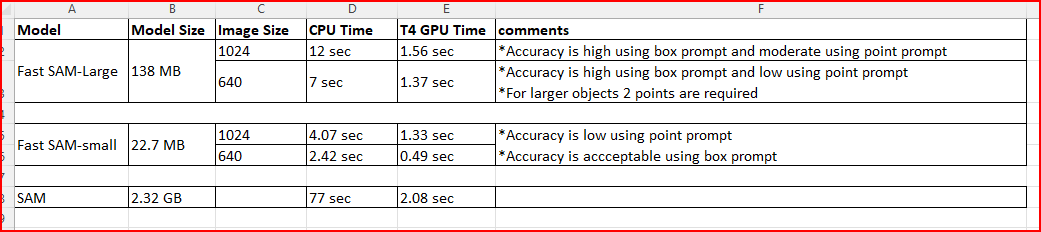

In [3]:
from ultralytics import FastSAM
from ultralytics.yolo.fastsam import FastSAMPrompt
import time
# Define image path and inference device

DEVICE = 'cpu'

# Create a FastSAM model
model = FastSAM('FastSAM.pt')  # or FastSAM-x.pt

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.


ModuleNotFoundError: ignored


image 1/1 /content/TheIrishmanimg_000001.png: 576x1024 28 objects, 92.7ms
Speed: 5.0ms preprocess, 92.7ms inference, 5.5ms postprocess per image at shape (1, 3, 576, 1024)
/usr/local/lib/python3.10/dist-packages/clip/clip.py:57: UserWarning: /root/.cache/clip/ViT-B-32.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(f"{download_target} exists, but the SHA256 checksum does not match; re-downloading the file")
100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 154MiB/s]


Execution time: 10.508559942245483 seconds


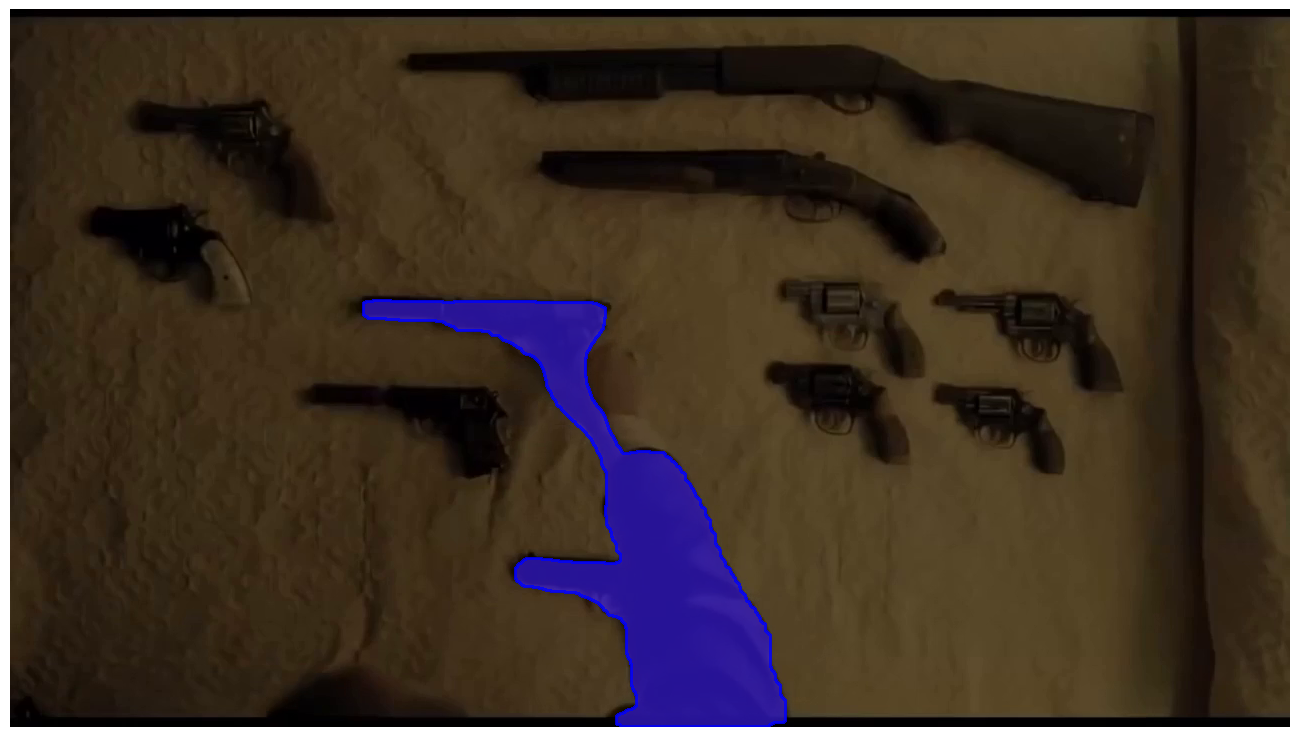

In [ ]:
# Run inference on an image

IMAGE_PATH = 'images/groceries.jpg'
st = time.time()
everything_results = model(IMAGE_PATH,
                           device=DEVICE,
                           retina_masks=True,
                           imgsz=1024,
                           conf=0.4,
                           iou=0.9)

prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)

# Everything prompt
#ann = prompt_process.everything_prompt()

# Bbox default shape [0,0,0,0] -> [x1,y1,x2,y2]
#ann = prompt_process.box_prompt(bbox=[342, 280, 616, 347])


# # Point prompt
# # points default [[0,0]] [[x1,y1],[x2,y2]]
# # point_label default [0] [1,0] 0:background, 1:foreground
#ann = prompt_process.point_prompt(points=[[740, 61], [1040, 29]], pointlabel=[1,0])

# Text prompt
# ann = prompt_process.text_prompt(text='brown gun')

prompt_process.plot(annotations=ann, output='output')
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')